In [47]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn import color_palette

import pandas as pd 
import numpy as np

import bokeh
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure, output_file, show, curdoc
from bokeh.models import Circle,BoxSelectTool, BoxZoomTool, LassoSelectTool,Text,HoverTool,ColumnDataSource, Range1d, Axis

In [184]:
totals = pd.Series(index=pd.date_range('1950-01-01','2015-12-31',freq='AS',),data=[97529,102475,106673,108515,113949,100346,115704,122845,133961,137311,152292,179267,188095,196106,221271,288753,327167,349344,364851,399384,405709,420089,448565,459029,495345,566369,606671,683684,703905,728908,749425,775628,810977,875161,893747,893536,909200,920189,901468,856502,880419,901808,922010,963477,1015818,1080336,1130853,1159929,1161957,1187808,1205276,1189963,1234480,1270516,1356955,1434957,1495934,1567550,1655220,1716898,1750645,1836125,1913473,2005909,2027312,1809485,])


In [156]:
df = pd.read_pickle('/Users/jaredlorince/Desktop/d_pop.pkl')

In [161]:
df = df.reset_index().pivot_table(index='date',columns='category',values='uid').fillna(0).ix[:'2015']


In [190]:
print '|'.join(df.columns),len(df.columns)

|Acoustics|Agricultural Economics & Policy|Agricultural Engineering|Agriculture, Dairy & Animal Science|Agriculture, Multidisciplinary|Agronomy|Allergy|Anatomy & Morphology|Andrology|Anesthesiology|Anthropology|Archaeology|Architecture|Area Studies|Art|Asian Studies|Astronomy & Astrophysics|Audiology & Speech-Language Pathology|Automation & Control Systems|Behavioral Sciences|Biochemical Research Methods|Biochemistry & Molecular Biology|Biodiversity Conservation|Biology|Biophysics|Biotechnology & Applied Microbiology|Business|Business, Finance|Cardiac & Cardiovascular Systems|Cell & Tissue Engineering|Cell Biology|Chemistry, Analytical|Chemistry, Applied|Chemistry, Inorganic & Nuclear|Chemistry, Medicinal|Chemistry, Multidisciplinary|Chemistry, Organic|Chemistry, Physical|Classics|Clinical Neurology|Communication|Computer Science, Artificial Intelligence|Computer Science, Cybernetics|Computer Science, Hardware & Architecture|Computer Science, Information Systems|Computer Science, Inter

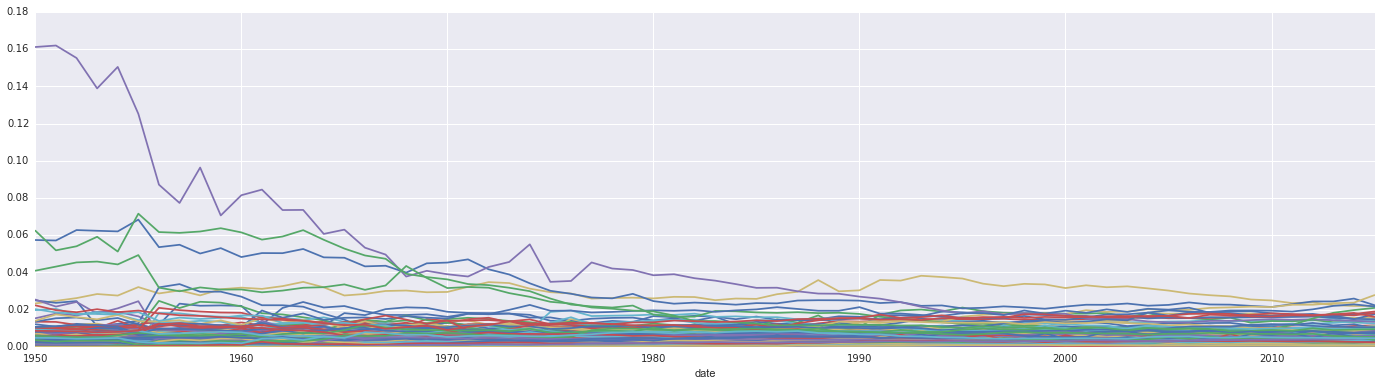

In [165]:
fig,ax = plt.subplots(1,1,figsize=(24,6))
(df.resample('A').sum()).divide(df.resample('A').sum().sum(1),axis=0).plot(legend=False,ax=ax)

In [185]:
#totals = df.sum(1)
cum_totals = totals.cumsum()

In [167]:
top = df.sum().sort_values(ascending=False).index

In [186]:
output_notebook()

def update(rawcount=True,cumulative=False,resample='yearly',discipline='Physics'):
    if discipline == 'all':
        discpline = df.columns
    else:
        discipline = discipline.strip().split('|')
    p = figure(width=800,height=350,x_axis_type='datetime',tools=['pan,box_zoom,reset'])
    p.select(dict(type=Axis, layout="left"))[0].formatter.use_scientific = False
    resample = {'Daily':'D','Weekly':'W','Monthly':'M','Yearly':'A'}[resample]
    freq = {'D':'D','W':'W','M':'MS','A':'AS'}[resample]
    idx = pd.date_range('1950-01-01','2015-12-31',freq=freq)
    datestrings = idx.map(lambda x: x.strftime('%Y-%m-%d'))

    lines = {}
    hovers = {}
    data = {}
    colors = ['#%02x%02x%02x' % (a, b, c) for a,b,c in np.round(255*np.array(color_palette("coolwarm",n_colors=len(discipline)))).astype(int)]
    for i,disc in enumerate(discipline):
        current = df[disc].resample(resample).sum()
        totals_current = totals.resample(resample).sum()

        if cumulative:
            cum_totals_current = cum_totals.resample(resample).sum()
            if rawcount:
                values = current.cumsum()
            else:
                values = current.cumsum()/cum_totals_current
        else:
            totals_current = totals.resample(resample).sum()
            if rawcount:
                values = current
            else:
                values = current/totals_current
        data[disc] = ColumnDataSource({'x':idx,'value':values,'date':datestrings,'percent':{False:values.apply(lambda x: "{:.2f}%".format(100*x)),True:values.apply(lambda x: "{:,.0f}".format(x))}[rawcount]})
        lines[disc] = p.line('x','value',source=data[disc],color=colors[i],line_width=2)
        hovers[disc] = HoverTool(renderers=[lines[disc]],tooltips=[('Discipline', disc),('date','@date'),('Publications this period','@percent')])
        p.add_tools(hovers[disc])
    show(p)
    




Loading BokehJS ...

In [187]:
from ipywidgets import Dropdown,Text,Checkbox,interact

disc_select = Text(description='Discipline',value='Physics')
rawcount_select = Checkbox(description = 'rawcount',value=True)
cumulative_select = Checkbox(description='cumulativ',value=False)
resample_select = Dropdown(description="Resample",options=["Daily","Weekly","Monthly","Yearly"],value="Yearly")


interact(update,rawcount=rawcount_select,cumulative=cumulative_select,
         disc=disc_select,resample=resample_select);


In [196]:
'|'.join([x for x in df.columns if 'bio' in x.lower()])

'Biochemical Research Methods|Biochemistry & Molecular Biology|Biodiversity Conservation|Biology|Biophysics|Biotechnology & Applied Microbiology|Cell Biology|Developmental Biology|Engineering, Biomedical|Evolutionary Biology|Marine & Freshwater Biology|Materials Science, Biomaterials|Mathematical & Computational Biology|Microbiology|Psychology, Biological|Reproductive Biology|Social Sciences, Biomedical'

In [194]:
x = df.resample('AS').sum().cumsum().T
'|'.join(x.index[(x['2000']<10000).ix[:,0]])

'Andrology|Cell & Tissue Engineering|Cultural Studies|Integrative & Complementary Medicine|Logic|Medical Ethics|Robotics'

In [140]:
cum_totals

date
1950-01-01       95083.0
1950-01-07       95085.0
1950-01-14       95087.0
1950-01-15       95173.0
1950-01-18       95190.0
1950-01-21       95193.0
1950-01-28       95196.0
1950-02-01       96219.0
1950-02-04       96222.0
1950-02-11       96226.0
1950-02-15       96376.0
1950-02-18       96379.0
1950-02-25       96380.0
1950-03-01       98275.0
1950-03-04       98277.0
1950-03-11       98279.0
1950-03-15       98399.0
1950-03-18       98402.0
1950-03-25       98404.0
1950-04-01      100109.0
1950-04-04      100114.0
1950-04-08      100116.0
1950-04-12      100125.0
1950-04-14      100128.0
1950-04-15      100281.0
1950-04-20      100325.0
1950-04-22      100327.0
1950-04-29      100330.0
1950-05-01      101812.0
1950-05-06      101814.0
                 ...    
2015-11-30    74074271.0
2015-12-01    74160327.0
2015-12-02    74163270.0
2015-12-03    74164373.0
2015-12-04    74165186.0
2015-12-05    74166608.0
2015-12-06    74166908.0
2015-12-07    74167875.0
2015-12-08    741688